<div class="row">
  <div class="column">
<img align="left" width="200" height="42" src="https://assets.ensam.eu/logo/fr/logo-trans-322x84.png" />  </div>
  <div class="column">
<img align="right" width="120" height="42" src="https://upload.wikimedia.org/wikipedia/commons/b/bd/CC-BY-NC-SA.svg"/>  </div>
</div>

Jean-Christophe Loiseau  
Maître de Conférences  
&#128231; : jean-christophe.loiseau@ensam.eu  
&#128198; : Février 2020

In [1]:
# --> Import numpy (calcul scientifique de base).
import numpy as np

# --> Utilitaires pour l'approximation polynomiale classique.
from numpy.polynomial.polynomial import polyfit, polyval

# --> Import matplotlib pour tracer les figures.
import matplotlib.pyplot as plt

# Approximation polynomiale

On s'intéresse dans ce TP au problème d'approximation d'une fonction $f : \mathbb{R} \mapsto \mathbb{R}$ que l'on supposera inconnue.
Pour cela, nous avons un ensemble de mesures

$$
    y_i = f(x_i) + \mathcal{N}(0, \sigma^2)
$$

où $f$ est la fonction inconnue et $\mathcal{N}(0, \sigma)$ est un bruit de mesure gaussien à moyenne nulle et de variance $\sigma^2$.
A partir de l'ensemble de mesures $(x_i, y_i)$, on se propose donc de trouver une fonction analytique $p(x)$ de sorte que

$$
    p(x_i) \simeq y_i.
$$

D'un point de vue mathématique, ce problème peut être formulé comme un problème de *minimisation*

$$
    \min_{p} \frac{1}{n} \sum_{i=1}^n (p(x_i) - y_i)^2,
$$

i.e. on cherche la fonction $p(x)$ qui minimise l'*erreur quadratique moyenne* entre ses prédictions et les mesures.
Dans la suite, on supposera que $p(x)$ appartient à la classe des fonctions polynômiales, comme par exemple

$$
    p(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \ldots
$$

Un tel problème est relativement classique en science et, à partir des mesures $(x_i, y_i)$, des fonctions `numpy` telles que `polyfit` et `polyval` nous permettent de le résoudre.
Un exemple est présenté ci-dessous.

## Exemple

Intéressons nous au cas où $f(x) = x - 2 \sin(x)$.
Les cellules `Jupyter` ci-dessous illustrent comment créer cette fonction, y ajouter un bruit blanc gaussien et tracer la figure résumant les mesures ainsi obtenues.

In [2]:
# --> Vraie fonction.
f = lambda x: x - 2*np.sin(x)
 
# --> Fonction + bruit
noisy_f = lambda x: f(x) + np.random.normal(loc=0.0, scale=0.25, size=x.size)

In [3]:
# --> Points de mesure -pi < x < pi.
xi = np.random.uniform(low=-np.pi, high=np.pi, size=(20,))

# --> Mesures y = f(x) + N(0, s^2).
yi = noisy_f(xi)

Text(0, 0.5, 'y')

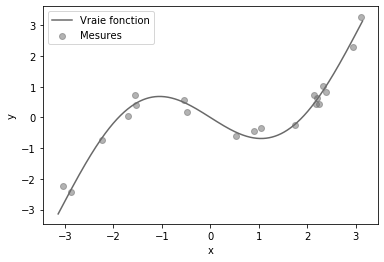

In [4]:
# --> Trace le nuage de point correspondant aux mesures.
plt.scatter(
    xi, yi,              # Nuage de points
    color="dimgray",     # Couleur
    label="Mesures",     # Label à utiliser dans la légende.
    alpha=0.5,           # Transparence
)

# --> Trace le courbe de la vraie fonction.
x = np.linspace(-np.pi, np.pi, 1024)

plt.plot(
    x, f(x),                    # Graphe de la fonction.
    label="Vraie fonction",     # Label à utiliser dans la légende
    color="dimgray",            # Couleur
)

# --> Ajoute légende.
plt.legend()

# --> Ajoute les titres des axes.
plt.xlabel("x")
plt.ylabel("y")

En regardant la figure ci-dessus, on voit que les mesures se répartissent en effet autour de la courbe de $f(x) = x - 2\sin(x)$ au détail près qu'elles sont bruitées.
La cellule ci-dessous illustre comment, à partir de ces mesures, identifier un polynôme de degré 3 qui approxime au mieux nos données.
La fonction `mse` permet par ailleurs de calculer l'erreur quadratique moyenne entre nos mesures et les prédictions du modèle ainsi obtenu.

In [5]:
# --> Fit un polynome de degré 3 en utilisant les données.
coefs = polyfit(xi, yi, 3)

# --> Fonction permettant d'évaluer p(x).
p = lambda x: polyval(x, coefs)

# --> Erreur quadratique moyenne (Mean Squared Error)
#    (i.e. écart entre le modèle et les données)
mse = lambda x, y, p: 0.5 * np.sum( (p(x) - y)**2 ) / len(y)

Traçons maintenant le graphe de notre modèle.

Text(0.5, 1.0, 'Erreur quadratique moyenne : 0.03')

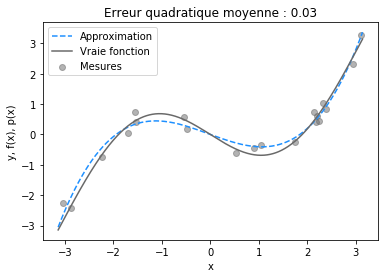

In [6]:
# --> Trace le nuage de points des mesures.
plt.scatter(
    xi, yi,
    color="dimgray",
    label="Mesures",
    alpha=0.5,
)

# --> Trace le graphe de la fonction approchée.
plt.plot(
    x, p(x),
    label="Approximation",
    color="dodgerblue",
    linestyle="--",
)

# --> Trace le graphe de la vraie fonction.
plt.plot(
    x, f(x),
    label="Vraie fonction",
    color="dimgray",
)

# --> Ajout le titre des axes.
plt.xlabel("x")
plt.ylabel("y, f(x), p(x)")

# --> Ajoute la légende.
plt.legend()

# --> Ajoute le titre de la figure.
plt.title(
    "Erreur quadratique moyenne : {0:0.2f}".format(mse(xi, yi, p))
)

Clairement, notre modèle polynômial de degré 3 semble approximer correctement les données que nous avons utilisées pour l'entraîner.
La question qui se pose est néanmoins la suivante : notre modèle $p(x)$ est-il capable de prédire correctement les valeurs obtenues pour de nouveaux points de mesure ?
Ceci est illustré ci-dessous.

In [7]:
# --> Nouveaux points de mesures.
x_new = np.random.uniform(low=-np.pi, high=np.pi, size=(20,))

# --> Mesures correspondantes.
y_new = noisy_f(x_new)

Text(0.5, 1.0, 'Erreur quadratique moyenne : 0.04')

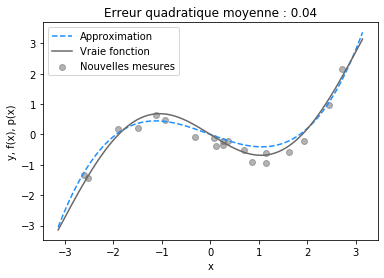

In [8]:
# --> Trace le nuage de points correspondant aux nouvelles mesures.
plt.scatter(
    x_new, y_new,
    color="dimgray",
    label="Nouvelles mesures",
    alpha=0.5,
)

# --> Trace le graphe de la fonction approximée.
plt.plot(
    x, p(x),
    label="Approximation",
    color="dodgerblue",
    linestyle="--",
)

# --> Trace le graphe de la vraie fonction.
plt.plot(
    x, f(x),
    label="Vraie fonction",
    color="dimgray",
)

# --> Ajoute le titre des axes.
plt.xlabel("x")
plt.ylabel("y, f(x), p(x)")

# --> Ajoute la légende.
plt.legend()

# --> Ajoute le titre de la figure.
plt.title(
    "Erreur quadratique moyenne : {0:0.2f}".format(mse(x_new, y_new, p))
)

Il semblerait que oui.
Le reste du TP consiste à étudier un peu plus en détail les propriétés de notre modèle et notamment comment choisir le bon degré polynômial pour notre approximation.

---
---

### Travail à faire

Dans l'exemple ci-dessus, nous nous sommes limités à approximer $f(x)$ par un polynôme de degré 3.
Bien qu'intuitif, ce choix est à priori arbitraire.
En effet, ayant 20 points de mesure pour apprendre la fonction, nous aurions pu approximer la fonction $f(x)$ par un polynôme de degré 19 passant exactement par ces 20 points, conduisant alors à une erreur quadratic moyenne nulle.
Bien que nous aurions été capable de prédire exactement les données du jeu d'entraînement, le problème avec une telle approche est que l'erreur faite sur le jeu de test serait alors extrêmement grande, limitant alors fortement les capacités prédictives de notre modèle.
Ce phénomène est connue en anglais sous le nom d'*overfitting* (ou sur-apprentissage).

Les objectifs de ce TP sont :
- d'illustrer ce phénomène de sur-apprentissage
- voir comment détecter ce phénomène
- illustrer comment choisir le degré polynômial de notre approximation de façon à avoir un équilibre entre la complexité de la fonction (i.e. son degré polynômial) et sa précision (i.e. l'erreur quadratique moyenne). Ceci est connu sous le nom de *principe de parsimonie*.

Pour ce faire, nous utiliserons dans un premier temps la même fonction que dans l'exemple ci-dessus.

#### Le phénomène de sur-apprentissage

(&#9733;&#9734;&#9734;&#9734;&#9734;) En vous inspirant de l'exemple ci-dessus, approximez le nuage de points $(x_i, y_i)$ par un polynôme de degré 19.

In [9]:
# --> Fit un polynome de degré 19 en utilisant les données.
coefs = polyfit(xi, yi, 19)

# -->
p19 = lambda x: polyval(x, coefs)

(&#9733;&#9733;&#9734;&#9734;&#9734;) Sur la même figure, tracez :
- le nuage de points correspondant aux mesures $(x_i, y_i)$,
- le graphe de la fonction $f(x)$,
- le graphe du polynôme $p(x)$ que vous venez d'identifier.

Vous penserez par ailleurs à ajouter le titre des axes, une légende ainsi que l'erreur quadratique moyenne de votre approximation en tant que titre de la figure.

Text(0.5, 1.0, 'Erreur quadratique moyenne : 0.00')

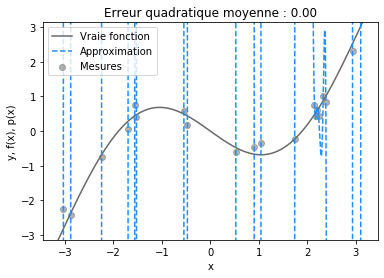

In [10]:
# -->
plt.scatter(
    xi, yi,
    color="dimgray",
    alpha=0.5,
    label="Mesures",
)

# -->
plt.plot(
    x, f(x),
    color="dimgray",
    label="Vraie fonction",
)

# --> Trace le graphe de la fonction approximée.
plt.plot(
    x, p19(x),
    label="Approximation",
    color="dodgerblue",
    linestyle="--",
)

# -->
plt.ylim(-np.pi, np.pi)

# --> Ajoute le titre des axes.
plt.xlabel("x")
plt.ylabel("y, f(x), p(x)")

# --> Ajoute la légende.
plt.legend()

# --> Ajoute le titre de la figure.
plt.title(
    "Erreur quadratique moyenne : {0:0.2f}".format(mse(xi, yi, p19))
)

(&#9733;&#9733;&#9734;&#9734;&#9734;) Faites la même chose qu'à la question précédente mais en illustrant avec le jeu de données de test, i.e. $(x_{new}, y_{new})$.

Text(0.5, 1.0, 'Erreur quadratique moyenne : 29272535428346.52')

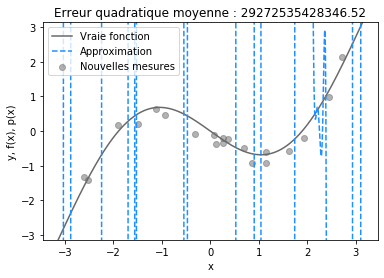

In [11]:
# -->
plt.scatter(
    x_new, y_new,
    color="dimgray",
    alpha=0.5,
    label="Nouvelles mesures",
)

# -->
plt.plot(
    x, f(x),
    color="dimgray",
    label="Vraie fonction",
)

# --> Trace le graphe de la fonction approximée.
plt.plot(
    x, p19(x),
    label="Approximation",
    color="dodgerblue",
    linestyle="--",
)

# -->
plt.ylim(-np.pi, np.pi)

# --> Ajoute le titre des axes.
plt.xlabel("x")
plt.ylabel("y, f(x), p(x)")

# --> Ajoute la légende.
plt.legend()

# --> Ajoute le titre de la figure.
plt.title(
    "Erreur quadratique moyenne : {0:0.2f}".format(mse(x_new, y_new, p19))
)

(&#9733;&#9733;&#9734;&#9734;&#9734;) En comparant ces deux graphiques, expliquez selon vous en quoi consiste ce problème de sur-apprentissage.

**Réponse :** Le sur-apprentissage est un phénomène qui a lieu lorsque l'on utilise une approximation polynômiale d'ordre trop élevée.
En effet, si l'on dispose de 20 mesures, il nous est possible de trouver un et un seul polynôme d'ordre 19 passant exactement par tous nos points de mesures.
Ce faisant, notre modèle a alors "appris" le bruit inhérent à nos mesures utilisées pour l'entraînement plus qu'autre chose.
Dès lors, la précision du modèle sur un nouveau jeu de mesure est alors catastrophique puisque le bruit y est différent.
Pour plus de détails sur ce phénomène, vous pouvez vous reporter à la page [Wikipedia](https://fr.wikipedia.org/wiki/Surapprentissage).

#### Comment le détecter?

Maintenant que nous avons vu en quoi consiste le phénomène de sur-apprentissage, intéressons nous à comment le détecter.
Pour cela, nous utiliserons des courbes connues simplement sous le nom de *courbes d'apprentissage*.

(&#9733;&#9733;&#9733;&#9734;&#9734;) Ecrivez une fonction qui, étant donné le jeu d'entraînement $(x_i, y_i)$ et celui de test $(x_{new}, y_{new})$, calcule l'erreur quadratique moyenne (`mse`) sur ces deux jeux de données pour différents degrés polynomiaux.
Le squelette de la fonction vous ai donné ci-dessous.

In [12]:
def learning_curve(xi, yi, xnew, ynew):
    
    # --> Nombre de points du jeu de données d'entraînement.
    n = len(xi)
    
    # --> Initialisation des variables.
    erreur_train = np.zeros(n)
    erreur_test = np.zeros(n)
    
    # --> Boucle calculant le polynôme de degré i et ses erreurs quadratiques moyennes.
    for i in range(n):
        
        # --> Fit le polynôme.
        c = polyfit(xi, yi, i)
        
        # --> Fonction permettant d'évaluer p(x).
        p = lambda x : polyval(x, c)
        
        # --> Erreur quadratique moyenne sur le jeu d'entraînement.
        erreur_train[i] = mse(xi, yi, p)
        
        # --> Erreur quadratique moyenne sur le jeu de test.
        erreur_test[i] = mse(xnew, ynew, p)
    
    return erreur_train, erreur_test

(&#9733;&#9733;&#9734;&#9734;&#9734;) Calculer à l'aide de la fonction ci-dessus l'évolution des erreurs quadratiques moyennes en fonction du degré polynômial de notre approximation puis tracer ces courbes.
Pour la figure, vous penserez à :
- ajouter une légende,
- ajouter le nom des axes

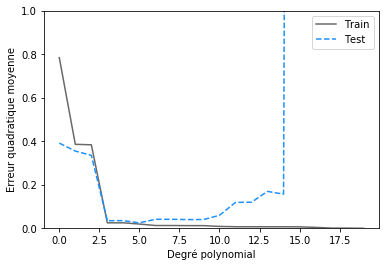

In [13]:
# --> Calcul les erreurs sur le jeu d'entraînement et de test.
erreur_train, erreur_test = learning_curve(xi, yi, x_new, y_new)

# --> Trace l'évolution de l'erreur sur le jeu d'entraînement.
plt.plot(
    erreur_train,
    label="Train",
    color="dimgray",
)

# --> Trace l'évolution de l'erreur sur le jeu de test.
plt.plot(
    erreur_test,
    label="Test",
    color="dodgerblue",
    linestyle="--"
)

# --> Ajoute les titres des axes.
plt.xlabel("Degré polynomial")
plt.ylabel("Erreur quadratique moyenne")

# --> Limite l'axe vertical à (0, 1).
plt.ylim(0, 1)

# --> Ajoute la légende.
plt.legend()

(&#9733;&#9733;&#9734;&#9734;&#9734;) En vous basant sur la courbe d'apprentissage que vous venez de tracer, à partir de quel degré polynômiale le phénomène de sur-apprentissage commence-t'il à apparaître selon vous?
Quel degré polynômial choisisseriez-vous pour votre modèle? Justifiez.

**Réponse :** En se basant sur la courbe ci-dessus, on peut y voir que les erreurs faites par le modèle sur le jeu d'entraînement et de test sont du même ordre de grandeur pour des degrés polynômiaux allant de 3 à 7.
Au delà, l'erreur sur le jeu de test croît extrêmement rapidement dû au phénomène de sur-apprentissage.
Par ailleurs, l'erreur entre un modèle polynômial d'ordre 3 et 7 étant très similaires, nous nous limiterons par soucis de simplicité au modèle d'ordre 3.